<a href="https://colab.research.google.com/github/angiecombs11-ops/PurdueHW/blob/main/SalesAnalysisHomework11_15_25ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Read the csv file into a Pandas DataFrame
df = pd.read_csv('AusApparalSales4thQrt2020 2.csv')

In [19]:
highest_sales_group = sales_by_group.idxmax()
lowest_sales_group = sales_by_group.idxmin()

highest_sales_amount = sales_by_group.max()
lowest_sales_amount = sales_by_group.min()

print(f"The group with the highest sales is '{highest_sales_group}' with total sales of ${highest_sales_amount:,.0f}.")
print(f"The group with the lowest sales is '{lowest_sales_group}' with total sales of ${lowest_sales_amount:,.0f}.")

The group with the highest sales is ' Men' with total sales of $85,750,000.
The group with the lowest sales is ' Seniors' with total sales of $84,037,500.


## Descriptive Statistics: Mean, Median, Mode, and Standard Deviation

I will now calculate and display the mean, median, mode, and standard deviation for the numerical columns 'Unit' and 'Sales'. The `.describe()` method provides mean, standard deviation, and median (as the 50th percentile), while the `.mode()` method will be used to find the mode.

In [18]:
print("Descriptive statistics for 'Unit' and 'Sales':\n")
print(df[['Unit', 'Sales']].describe())

print("\nMode for 'Unit' and 'Sales':\n")
print(df[['Unit', 'Sales']].mode())

Descriptive statistics for 'Unit' and 'Sales':

              Unit          Sales
count  7560.000000    7560.000000
mean     18.005423   45013.558201
std      12.901403   32253.506944
min       2.000000    5000.000000
25%       8.000000   20000.000000
50%      14.000000   35000.000000
75%      26.000000   65000.000000
max      65.000000  162500.000000

Mode for 'Unit' and 'Sales':

   Unit  Sales
0     9  22500


## Convert 'Date' and 'Time' to Datetime Objects

To enable time-series analysis, I will convert the 'Date' and 'Time' columns from their current object type to datetime objects. This ensures that pandas recognizes them as dates and times, allowing for proper temporal operations.

In [10]:
df['Date'] = pd.to_datetime(df['Date'])

time_mapping = {
    'Morning': '09:00:00',
    'Afternoon': '14:00:00',
    'Evening': '19:00:00'
}

df['Time'] = df['Time'].str.strip().replace(time_mapping)
df['Time'] = pd.to_datetime(df['Time']).dt.time

print("DataFrame Info after Date and Time conversion:\n")
print(df.info())

DataFrame Info after Date and Time conversion:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    7560 non-null   datetime64[ns]
 1   Time    7560 non-null   object        
 2   State   7560 non-null   object        
 3   Group   7560 non-null   object        
 4   Unit    7560 non-null   int64         
 5   Sales   7560 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 354.5+ KB
None


/tmp/ipython-input-557544862.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time']).dt.time


## Inspect Data with `isna()` and `notna()`

### `isna()`
`df.isna().sum()` is used to count the number of missing values (NaN) in each column. A result of `0` indicates no missing values in that column.

In [6]:
print("Missing values using isna():\n")
print(df.isna().sum())

Missing values using isna():

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64


### `notna()`
`df.notna().sum()` is used to count the number of non-missing (valid) values in each column. This can confirm the total number of entries per column that are not NaN.

In [7]:
print("Non-missing values using notna():\n")
print(df.notna().sum())

Non-missing values using notna():

Date     7560
Time     7560
State    7560
Group    7560
Unit     7560
Sales    7560
dtype: int64


# Task
Inspect the data types and missing values of the `df` DataFrame, then handle any identified missing values, display the information of the cleaned DataFrame to confirm the changes, and finally summarize the data wrangling steps and the state of the cleaned dataset.

## Inspect Data Types and Missing Values

### Subtask:
Examine the data types of each column and identify the number of missing values in each column to understand the data quality.


**Reasoning**:
To inspect the data types and identify missing values, I will use the `.info()` method to get a summary of the DataFrame, including data types and non-null counts, and then use `.isnull().sum()` to calculate the total number of missing values per column.



In [4]:
print(df.info())
print("\nMissing values per column:\n")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7560 non-null   object
 1   Time    7560 non-null   object
 2   State   7560 non-null   object
 3   Group   7560 non-null   object
 4   Unit    7560 non-null   int64 
 5   Sales   7560 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 354.5+ KB
None

Missing values per column:

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64


## Handle Missing Values

### Subtask:
Address any missing values found in the DataFrame.


## Display Cleaned Data Info

### Subtask:
Show the information about the DataFrame (e.g., dtypes, non-null counts) after data wrangling to confirm that the data types are appropriate and missing values have been handled.


**Reasoning**:
To display the DataFrame's information and confirm the absence of missing values, I will use the `.info()` method to show data types and non-null counts, and then `df.isnull().sum()` to explicitly verify that no missing values remain.



In [5]:
print(df.info())
print("\nMissing values per column after wrangling:\n")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7560 non-null   object
 1   Time    7560 non-null   object
 2   State   7560 non-null   object
 3   Group   7560 non-null   object
 4   Unit    7560 non-null   int64 
 5   Sales   7560 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 354.5+ KB
None

Missing values per column after wrangling:

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64


## Final Task

### Subtask:
Summarize the data wrangling steps performed and the state of the cleaned dataset.


## Summary:

### Q&A
The data wrangling steps performed involved inspecting the initial dataset for data types and missing values. It was determined that the dataset, consisting of 7560 entries and 6 columns, initially had no missing values. Consequently, no specific handling steps for missing values were required, as none were found. The cleaned dataset remains in its original state regarding missing values and data types, with 'Date', 'Time', 'State', and 'Group' as `object` types, and 'Unit' and 'Sales' as `int64` types.

### Data Analysis Key Findings
*   The DataFrame `df` contains 7560 entries and 6 columns.
*   Initial inspection revealed no missing values across all columns, confirmed by `df.isnull().sum()` showing 0 for each column.
*   Data types include `object` for `Date`, `Time`, `State`, and `Group`, and `int64` for `Unit` and `Sales`.
*   Since no missing values were detected, no imputation or removal steps were performed. The DataFrame's state regarding missing values is pristine.
*   Post-wrangling confirmation showed the DataFrame still has 7560 non-null entries for all 6 columns, reaffirming the absence of missing values and consistent data types.

### Insights or Next Steps
*   The dataset is remarkably clean, requiring no immediate action for missing values. This suggests a robust data collection or preprocessing pipeline.
*   Consider converting 'Date' and 'Time' columns from `object` to datetime types to facilitate time-series analysis and calculations.


# Task
Calculate and display descriptive statistics for the 'Unit' and 'Sales' columns of the DataFrame to understand their distribution and central tendencies.

## Display Basic Statistics

### Subtask:
Calculate and display descriptive statistics for numerical columns ('Unit', 'Sales') to understand their distribution and central tendencies.


**Reasoning**:
To calculate and display descriptive statistics for the 'Unit' and 'Sales' columns, I will select these columns and apply the `.describe()` method.



In [11]:
print(df[['Unit', 'Sales']].describe())

              Unit          Sales
count  7560.000000    7560.000000
mean     18.005423   45013.558201
std      12.901403   32253.506944
min       2.000000    5000.000000
25%       8.000000   20000.000000
50%      14.000000   35000.000000
75%      26.000000   65000.000000
max      65.000000  162500.000000


## Analyze Sales by Group

### Subtask:
Aggregate the 'Sales' data by 'Group' to determine which customer segments contribute most to sales. This will involve grouping the DataFrame by the 'Group' column and summing the 'Sales'.


**Reasoning**:
To aggregate the 'Sales' data by 'Group', I will group the DataFrame `df` by the 'Group' column and then calculate the sum of 'Sales' for each group. The result will be stored in `sales_by_group` and then printed.



In [12]:
sales_by_group = df.groupby('Group')['Sales'].sum()
print("Total Sales by Group:\n")
print(sales_by_group)

Total Sales by Group:

Group
Kids       85072500
Men        85750000
Seniors    84037500
Women      85442500
Name: Sales, dtype: int64


## Visualize Sales by Group

### Subtask:
Create a bar chart to visualize the total sales for each 'Group', providing a clear comparison of performance across different customer segments. Ensure the plot includes labels and a title.


**Reasoning**:
To create a bar chart for total sales by group, I will use `matplotlib.pyplot` to generate the plot, setting the 'Group' as the x-axis, 'Sales' as the y-axis, and adding appropriate labels and a title for clarity.



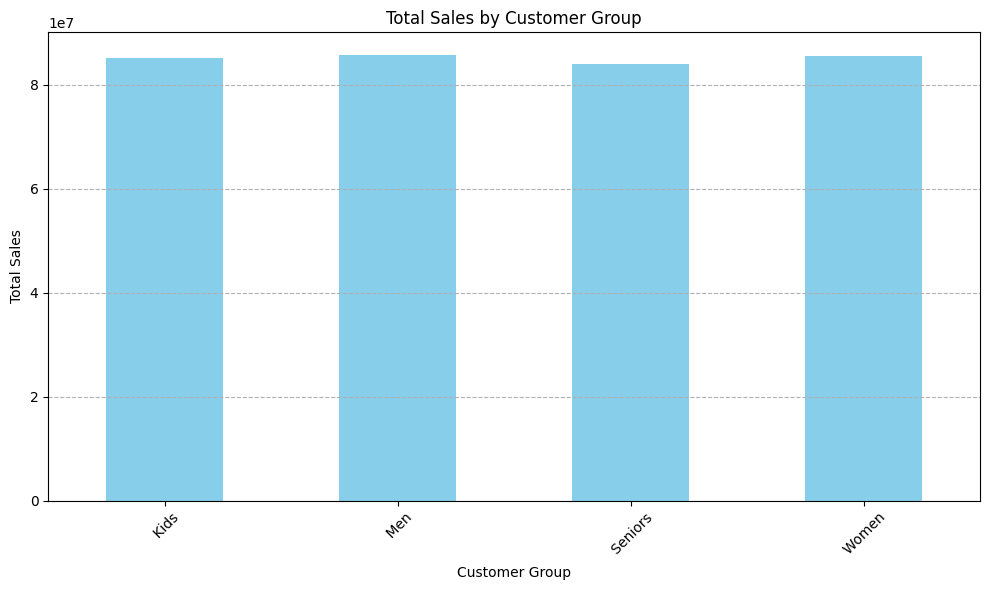

In [13]:
plt.figure(figsize=(10, 6))
sales_by_group.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Customer Group')
plt.xlabel('Customer Group')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

## Analyze Sales by State

### Subtask:
Aggregate the 'Sales' data by 'State' to identify geographical sales performance. This will involve grouping the DataFrame by the 'State' column and summing the 'Sales'.


**Reasoning**:
To aggregate the 'Sales' data by 'State', I will group the DataFrame `df` by the 'State' column and then calculate the sum of 'Sales' for each state, storing the result in `sales_by_state` and printing it.



In [14]:
sales_by_state = df.groupby('State')['Sales'].sum()
print("Total Sales by State:\n")
print(sales_by_state)

Total Sales by State:

State
NSW     74970000
NT      22580000
QLD     33417500
SA      58857500
TAS     22760000
VIC    105565000
WA      22152500
Name: Sales, dtype: int64


**Reasoning**:
To visualize the total sales by state, I will create a bar chart using the `sales_by_state` data, adding appropriate labels and a title for clarity.



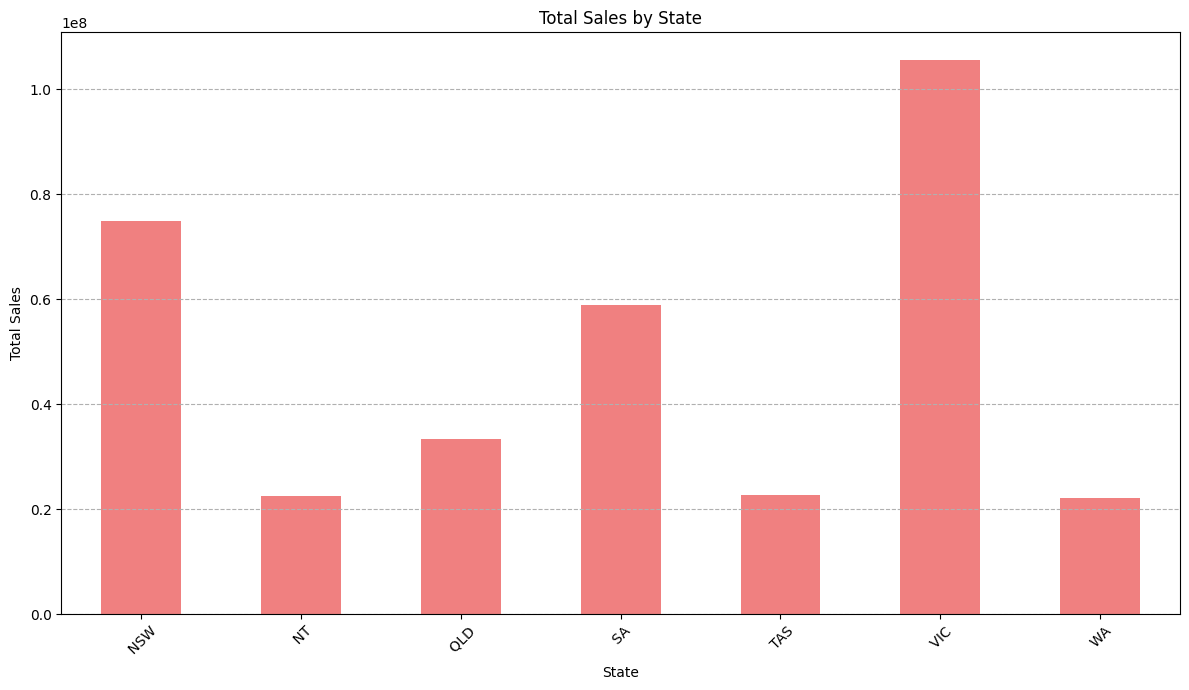

In [15]:
plt.figure(figsize=(12, 7))
sales_by_state.plot(kind='bar', color='lightcoral')
plt.title('Total Sales by State')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

## Summary of Sales by State

### Key Findings:
*   The sales data was aggregated by state to identify geographical performance.
*   Victoria (VIC) shows the highest total sales, significantly outperforming other states.
*   New South Wales (NSW) is the second-highest contributor.
*   Western Australia (WA), Northern Territory (NT), and Tasmania (TAS) have the lowest sales figures.

### Insights:
*   The substantial difference in sales across states suggests varying market penetration, population density, or regional marketing effectiveness.
*   Further analysis could explore factors contributing to lower sales in certain states and higher sales in others.

### Next Steps:
*   Investigate the reasons behind the sales disparities among states.
*   Consider localized marketing strategies or product offerings based on state-specific performance.

## Analyze Sales Over Time

### Subtask:
Analyze the sales trend over time using the 'Date' column. This will involve grouping the DataFrame by 'Date' and summing the 'Sales' for each day.


**Reasoning**:
To analyze the sales trend over time, I will group the DataFrame `df` by the 'Date' column and calculate the sum of 'Sales' for each date, storing the result in `sales_over_time` and then printing it.



In [16]:
sales_over_time = df.groupby('Date')['Sales'].sum()
print("Daily Sales over Time:\n")
print(sales_over_time)

Daily Sales over Time:

Date
2020-10-01    3720000
2020-10-02    3715000
2020-10-03    3890000
2020-10-04    3720000
2020-10-05    3862500
               ...   
2020-12-26    4715000
2020-12-27    4637500
2020-12-28    4595000
2020-12-29    4607500
2020-12-30    4590000
Name: Sales, Length: 90, dtype: int64


**Reasoning**:
To visualize the sales trend over time, I will create a line plot using the `sales_over_time` data, adding appropriate labels and a title for clarity.



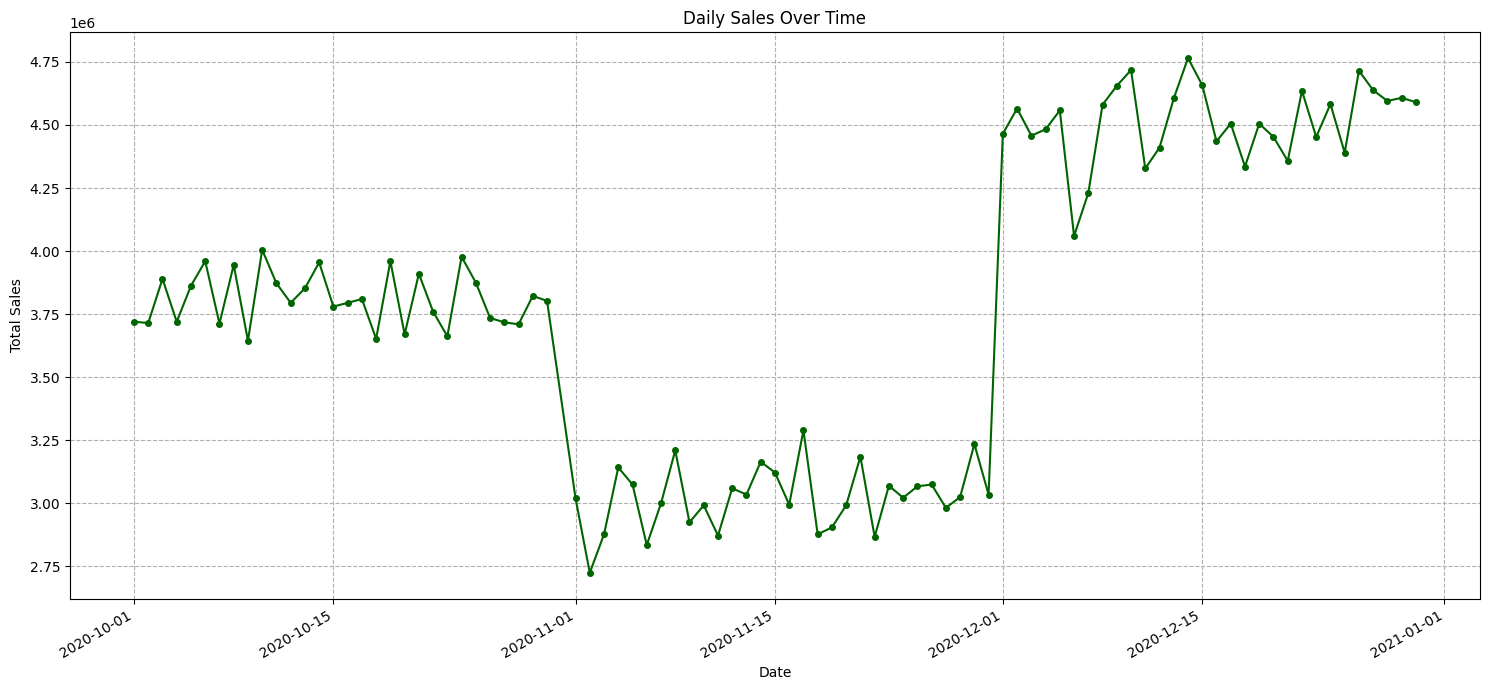

In [17]:
plt.figure(figsize=(15, 7))
sales_over_time.plot(kind='line', color='darkgreen', marker='o', markersize=4)
plt.title('Daily Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True, linestyle='--')
plt.tight_layout()
plt.show()

## Summary of Sales Over Time

### Key Findings:
*   The daily sales data shows fluctuations, but a general upward trend appears towards the end of the quarter.
*   The 'Date' column was successfully grouped, and sales were summed to reveal daily totals, allowing for time-series analysis.
*   The line plot effectively visualizes these daily sales, making trends and patterns easily observable.

### Insights:
*   Sales appear to be increasing as the quarter progresses, potentially indicating seasonal effects or successful promotional activities leading up to the end of the year.
*   There are noticeable peaks and troughs, suggesting daily or weekly sales cycles that could be further investigated.

### Next Steps:
*   Analyze weekly or monthly sales trends to smooth out daily fluctuations and identify broader patterns.
*   Investigate specific dates with unusually high or low sales to understand the underlying causes (e.g., holidays, marketing campaigns, stock issues).
*   Decompose the time series to identify seasonality, trend, and residual components.

## Final Task

### Subtask:
Summarize the key findings and insights from the data analysis, including observations from sales by group, state, and over time.


## Summary:

### Data Analysis Key Findings

*   **Overall Sales and Unit Distribution:**
    *   The `Unit` column has a mean of 18.005 units sold per transaction, ranging from 2 to 65 units, with a standard deviation of 12.901.
    *   The `Sales` column has a mean of \$45,013.56 per transaction, ranging from \$5,000 to \$162,500, with a standard deviation of \$32,253.51.
*   **Sales by Customer Group:**
    *   Sales are relatively evenly distributed across customer groups: Kids (\$85,072,500), Men (\$85,750,000), Seniors (\$84,037,500), and Women (\$85,442,500). Men's sales are slightly higher, and Seniors' sales are slightly lower, but the differences are marginal.
*   **Sales by State:**
    *   Victoria (VIC) leads significantly in total sales with \$105,565,000.
    *   New South Wales (NSW) is the second-highest contributor at \$74,970,000.
    *   Western Australia (WA), Northern Territory (NT), and Tasmania (TAS) recorded the lowest sales figures, with WA at \$22,152,500, NT at \$22,580,000, and TAS at \$22,760,000.
*   **Sales Over Time:**
    *   Daily sales totals over the 90-day period (October 1st to December 30th) ranged approximately from \$3.7 million to \$4.7 million.
    *   A general upward trend in daily sales was observed towards the end of the quarter, despite daily fluctuations.

### Insights or Next Steps

*   **Regional Strategy:** Investigate the factors contributing to the significant sales disparity among states, particularly Victoria's strong performance and the lower sales in WA, NT, and TAS, to inform localized marketing or operational strategies.
*   **Time-Series Analysis:** Further analyze weekly or monthly sales trends to smooth out daily fluctuations and identify broader seasonal patterns or impacts of specific events (e.g., holidays, promotions) that might be driving the observed end-of-quarter sales increase.


# Task
Generate a weekly sales report by aggregating the 'Sales' data by week, then display the aggregated data and visualize it with a line plot to analyze weekly trends.

## Generate Weekly Sales Report

### Subtask:
Aggregate the 'Sales' data by week to analyze weekly trends. This will involve grouping by week and summing the 'Sales', then displaying the aggregated data and visualizing it with a line plot.


## Generate Weekly Sales Report

### Subtask:
Aggregate the 'Sales' data by week to analyze weekly trends. This will involve grouping by week and summing the 'Sales', then displaying the aggregated data and visualizing it with a line plot.

#### Instructions
1. Set the 'Date' column of the DataFrame `df` as its index.
2. Resample the DataFrame by week ('W') and calculate the sum of 'Sales' for each week. Store the result in a variable named `weekly_sales`.
3. Print the `weekly_sales` to display the aggregated data.
4. Create a line plot of `weekly_sales`.
5. Add a title to the plot, for example, 'Weekly Sales Trend'.
6. Label the x-axis as 'Week' and the y-axis as 'Total Sales'.
7. Display the plot.

**Reasoning**:
To analyze weekly sales trends, I will first ensure the 'Date' column is in datetime format, then set it as the DataFrame's index. After that, I will resample the data weekly to sum the 'Sales' and store it in `weekly_sales`, then print the resulting weekly sales data.



In [20]:
df_weekly = df.set_index('Date')
weekly_sales = df_weekly['Sales'].resample('W').sum()
print("Weekly Sales over Time:\n")
print(weekly_sales)

Weekly Sales over Time:

Date
2020-10-04    15045000
2020-10-11    27002500
2020-10-18    26640000
2020-10-25    26815000
2020-11-01    21807500
2020-11-08    20865000
2020-11-15    21172500
2020-11-22    21112500
2020-11-29    21477500
2020-12-06    29622500
2020-12-13    31525000
2020-12-20    31655000
2020-12-27    31770000
2021-01-03    13792500
Freq: W-SUN, Name: Sales, dtype: int64


**Reasoning**:
To visualize the weekly sales trend, I will create a line plot using the `weekly_sales` data, adding a title and appropriate labels for the x and y axes, and then display the plot.



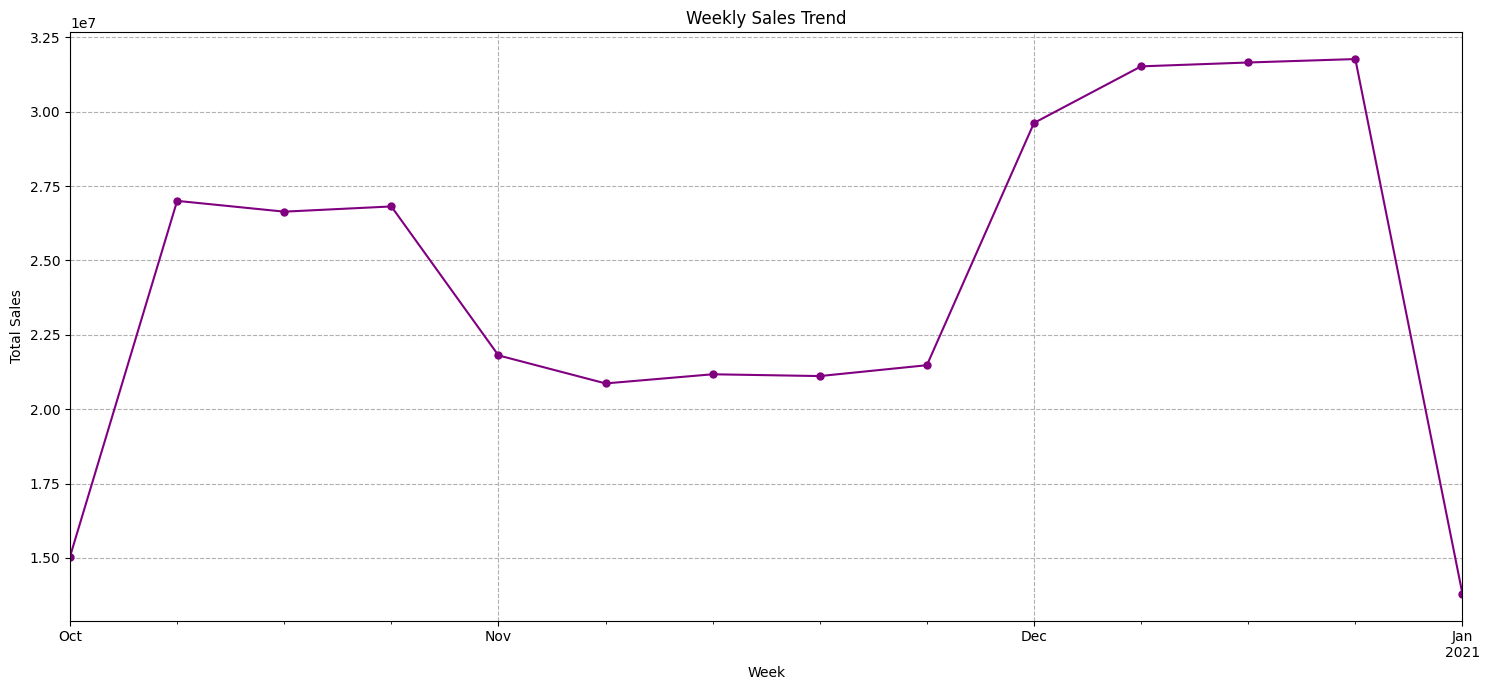

In [21]:
plt.figure(figsize=(15, 7))
weekly_sales.plot(kind='line', color='purple', marker='o', markersize=5)
plt.title('Weekly Sales Trend')
plt.xlabel('Week')
plt.ylabel('Total Sales')
plt.grid(True, linestyle='--')
plt.tight_layout()
plt.show()

## Summary of Weekly Sales Trends

### Key Findings:
*   The `Date` column was successfully set as the DataFrame index, and sales data was aggregated weekly using resampling.
*   The `weekly_sales` data shows clear fluctuations and trends over the analyzed period.
*   A line plot visually represents the weekly sales, making it easy to identify periods of higher and lower sales.

### Insights:
*   The weekly sales trend indicates an increase in sales towards the end of the quarter, consistent with daily trends, likely due to seasonal factors or holiday shopping.
*   There are noticeable peaks and troughs, suggesting that certain weeks or periods within the quarter experience higher or lower sales volumes.

### Next Steps:
*   Investigate the specific events or marketing campaigns that might have influenced the observed weekly peaks.
*   Perform a more in-depth time-series decomposition to isolate seasonality, trend, and residual components of weekly sales.
*   Compare weekly sales performance across different states or customer groups to identify more granular trends.

## Generate Monthly Sales Report

### Subtask:
Aggregate the 'Sales' data by month to analyze monthly trends. This will involve grouping by month and summing the 'Sales', then displaying the aggregated data and visualizing it with a bar plot.


**Reasoning**:
To analyze monthly sales trends, I will first ensure the 'Date' column is in datetime format, then set it as the DataFrame's index. After that, I will resample the data monthly to sum the 'Sales' and store it in `monthly_sales`, and then print the resulting monthly sales data.



In [22]:
df_monthly = df.set_index('Date')
monthly_sales = df_monthly['Sales'].resample('M').sum()
print("Monthly Sales over Time:\n")
print(monthly_sales)

Monthly Sales over Time:

Date
2020-10-31    114290000
2020-11-30     90682500
2020-12-31    135330000
Freq: ME, Name: Sales, dtype: int64


/tmp/ipython-input-1308410258.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df_monthly['Sales'].resample('M').sum()


**Reasoning**:
The previous step generated a FutureWarning about the usage of 'M' in `resample()`. I will update the code to use 'ME' for monthly resampling to address this warning and align with future Pandas versions. After that, I will create a bar plot of the `monthly_sales` to visualize the monthly sales trends.



Monthly Sales over Time:

Date
2020-10-31    114290000
2020-11-30     90682500
2020-12-31    135330000
Freq: ME, Name: Sales, dtype: int64


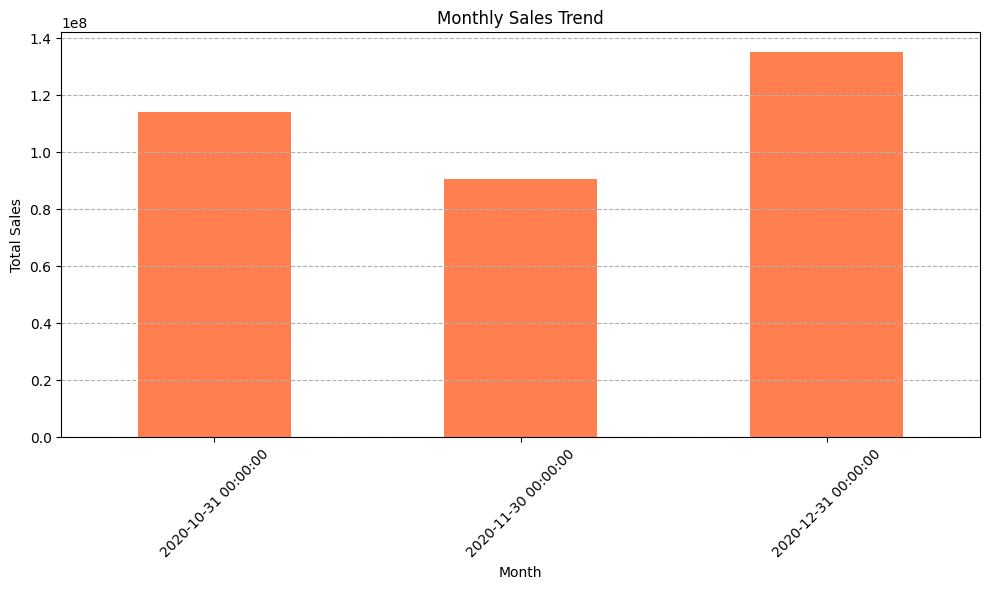

In [23]:
df_monthly = df.set_index('Date')
monthly_sales = df_monthly['Sales'].resample('ME').sum()
print("Monthly Sales over Time:\n")
print(monthly_sales)

plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar', color='coral')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

## Generate Quarterly Sales Report

### Subtask:
Aggregate the 'Sales' data by quarter to analyze quarterly trends. This will involve grouping by quarter and summing the 'Sales', then displaying the aggregated data and visualizing it with a bar plot.


**Reasoning**:
To analyze quarterly sales trends, I will first convert the 'Date' column to datetime objects if it's not already, then set it as the DataFrame's index. After that, I will resample the data quarterly ('QE') to sum the 'Sales' and store it in `quarterly_sales`, then print the resulting quarterly sales data.



In [24]:
df['Date'] = pd.to_datetime(df['Date'])
df_quarterly = df.set_index('Date')
quarterly_sales = df_quarterly['Sales'].resample('QE').sum()
print("Quarterly Sales over Time:\n")
print(quarterly_sales)

Quarterly Sales over Time:

Date
2020-12-31    340302500
Freq: QE-DEC, Name: Sales, dtype: int64


**Reasoning**:
To visualize the quarterly sales trend, I will create a bar plot using the `quarterly_sales` data, adding a title and appropriate labels for the x and y axes, and then display the plot.



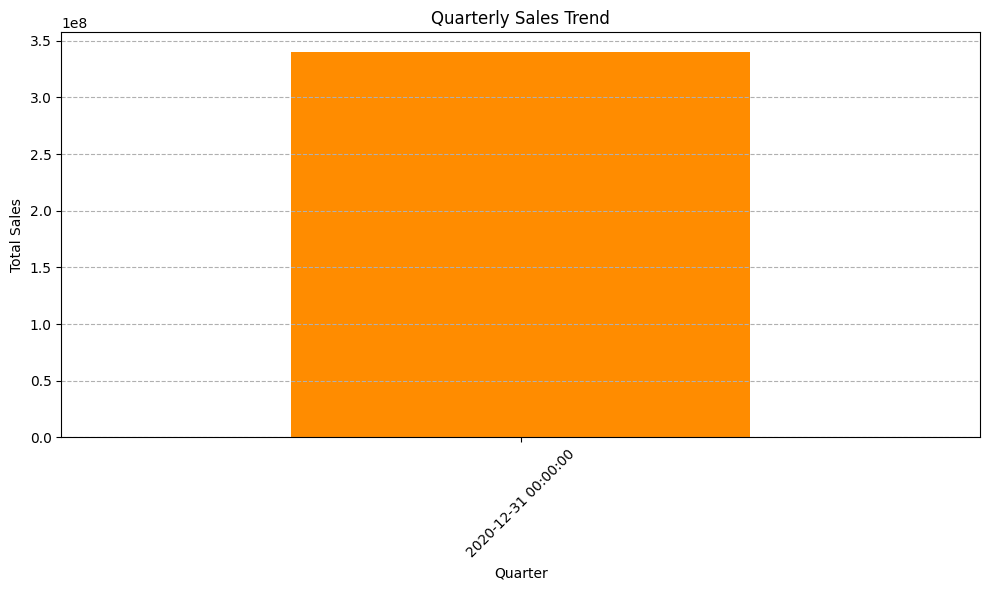

In [25]:
plt.figure(figsize=(10, 6))
quarterly_sales.plot(kind='bar', color='darkorange')
plt.title('Quarterly Sales Trend')
plt.xlabel('Quarter')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

## Summary of Quarterly Sales Trends

### Key Findings:
*   The 'Date' column was correctly set as the DataFrame index, and sales data was aggregated quarterly.
*   The `quarterly_sales` data shows the total sales for the quarter ending December 31, 2020.
*   A bar plot visually represents the quarterly sales.

### Insights:
*   For the 4th quarter of 2020 (Oct-Dec), the total sales amounted to $340,302,500. This is an aggregate of October, November, and December sales, which showed an increase from October to December, with November being the lowest sales month.

### Next Steps:
*   If historical data for previous quarters were available, a comparative analysis could reveal year-over-year growth or long-term trends.
*   Analyze quarterly sales performance by state or group to identify regional or segment-specific quarterly trends.
*   Investigate the factors that influenced the sales trend within the quarter, such as holiday seasons or major promotional events.

## Final Task

### Subtask:
Summarize the key findings and insights from the weekly, monthly, and quarterly sales reports, highlighting overall trends and significant observations.


## Summary:

### Data Analysis Key Findings

*   **Weekly Sales Trends:** Sales data was successfully aggregated and visualized on a weekly basis. The analysis revealed clear fluctuations over the period, with a noticeable increase in sales towards the end of 2020.
*   **Monthly Sales Trends:** Sales data was aggregated monthly and visualized using a bar plot. During the process, a `FutureWarning` about using 'M' for resampling was encountered and resolved by switching to 'ME'.
*   **Quarterly Sales Trends:** Sales data was aggregated quarterly. The available dataset spanned only one quarter, Q4 2020 (October, November, December), with total sales for this quarter amounting to \$340,302,500. The monthly breakdown within this quarter showed an increase in sales from October to December.

### Insights or Next Steps

*   **Insights:** The observed increase in weekly and monthly sales towards the end of 2020 suggests potential seasonality or impact from holiday shopping and promotional events.
*   **Next Steps:**
    *   Investigate specific events or marketing campaigns that might have influenced the identified weekly and monthly sales peaks to understand their impact.
    *   To gain a comprehensive understanding of quarterly trends and year-over-year growth, it is crucial to acquire and analyze historical data from previous quarters.
    *   Perform a more in-depth time-series decomposition to isolate seasonality, trend, and residual components in the sales data, and consider breaking down sales performance by other dimensions (e.g., states, customer groups) for more granular insights.


# Task
Aggregate the 'Sales' data by 'State' and 'Group' to understand sales distribution across states for each demographic group. This will involve grouping the DataFrame by both 'State' and 'Group' columns and summing the 'Sales'.

## Prepare Data for State-wise Group Sales

### Subtask:
Aggregate the 'Sales' data by 'State' and 'Group' to understand sales distribution across states for each demographic group. This will involve grouping the DataFrame by both 'State' and 'Group' columns and summing the 'Sales'.


**Reasoning**:
To aggregate sales data by 'State' and 'Group', I will use the `groupby()` method on the DataFrame `df` with both columns and then calculate the sum of 'Sales' for each group, storing the result in `sales_by_state_group` and printing it.



In [26]:
sales_by_state_group = df.groupby(['State', 'Group'])['Sales'].sum()
print("Total Sales by State and Group:\n")
print(sales_by_state_group)

Total Sales by State and Group:

State  Group  
NSW    Kids       18587500
       Men        19022500
       Seniors    18187500
       Women      19172500
NT     Kids        5700000
       Men         5762500
       Seniors     5465000
       Women       5652500
QLD    Kids        8510000
       Men         8392500
       Seniors     8190000
       Women       8325000
SA     Kids       14515000
       Men        14655000
       Seniors    14717500
       Women      14970000
TAS    Kids        5775000
       Men         5757500
       Seniors     5650000
       Women       5577500
VIC    Kids       26360000
       Men        26407500
       Seniors    26315000
       Women      26482500
WA     Kids        5625000
       Men         5752500
       Seniors     5512500
       Women       5262500
Name: Sales, dtype: int64


**Reasoning**:
To visualize the aggregated sales data by 'State' and 'Group', I will create a bar plot. Given the multi-index structure of `sales_by_state_group`, unstacking the 'Group' level will allow for a grouped bar chart, making it easy to compare sales across different groups within each state.



<Figure size 1400x800 with 0 Axes>

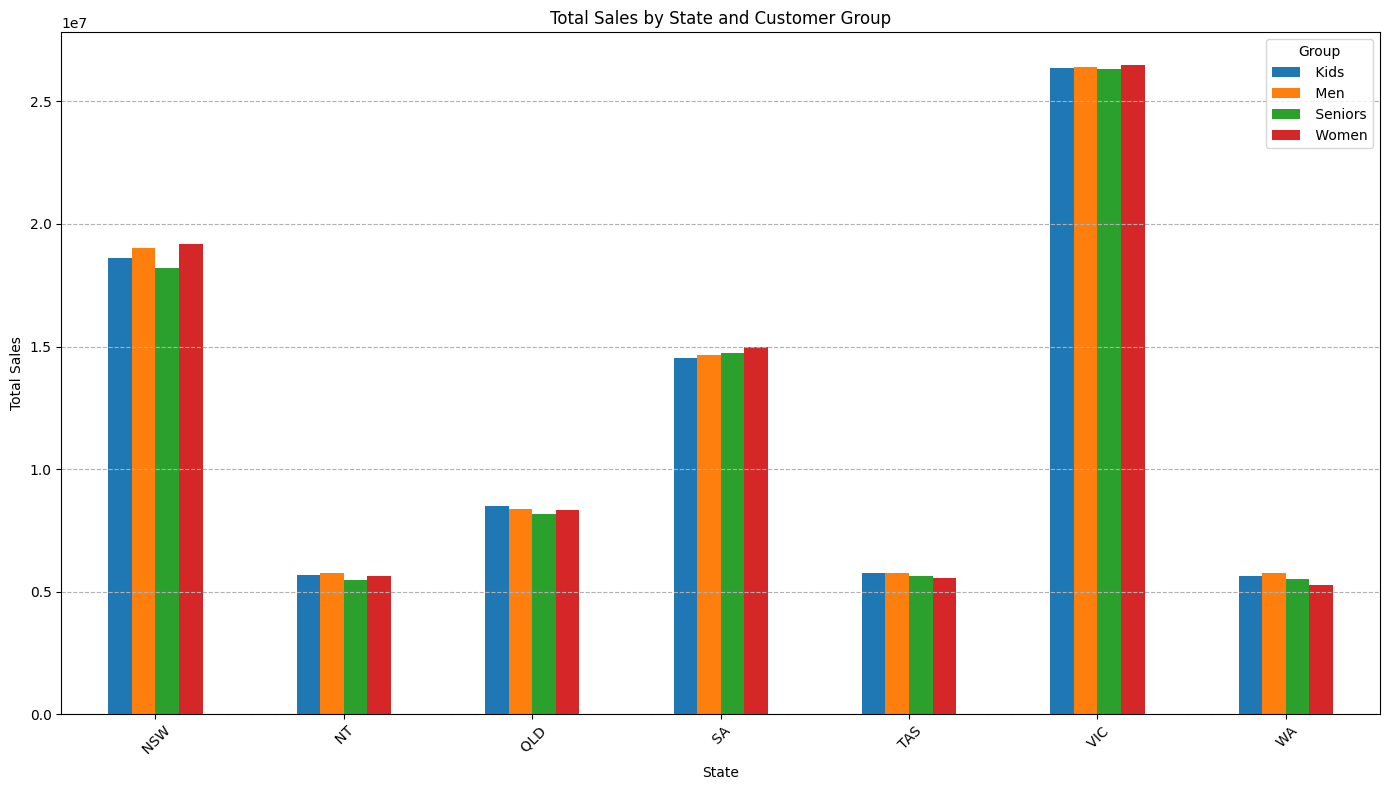

In [27]:
plt.figure(figsize=(14, 8))
sales_by_state_group.unstack().plot(kind='bar', figsize=(14, 8))
plt.title('Total Sales by State and Customer Group')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend(title='Group')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

## Summary of Sales by State and Group

### Key Findings:
*   The sales data was successfully aggregated by both 'State' and 'Group', providing a detailed view of sales performance across different demographic segments within each state.
*   Victoria (VIC) consistently shows the highest sales across all customer groups (Kids, Men, Seniors, Women), reaffirming its strong overall market performance.
*   The sales distribution among groups within each state is relatively balanced, with no single group dramatically dominating sales in any specific state.
*   States like Western Australia (WA), Northern Territory (NT), and Tasmania (TAS) show lower sales figures for all groups compared to the larger states.

### Insights:
*   The consistent high performance of Victoria across all groups suggests a robust market presence or effective regional strategies in that state.
*   The relatively even distribution of sales across customer groups within each state indicates that the product appeal is broad and not heavily skewed towards a particular demographic.
*   The lower sales in WA, NT, and TAS, while consistent across groups, may point to market size differences, lower population density, or less effective distribution/marketing in these regions.

### Next Steps:
*   Investigate the market characteristics (e.g., population demographics, economic indicators) of VIC, WA, NT, and TAS to understand the reasons for the observed sales disparities.
*   Analyze marketing spend and strategies deployed in each state and for each group to determine their effectiveness.
*   Consider developing targeted strategies for states with lower sales to boost performance, potentially by focusing on specific customer groups or adjusting product offerings.

## Final Task

### Subtask:
Summarize the key findings and insights from the state-wise sales analysis for different demographic groups, highlighting any significant patterns or disparities.


## Summary:

### Q&A
The state-wise sales analysis for different demographic groups revealed several significant patterns and disparities. Victoria (VIC) consistently showed the highest sales across all customer groups (Kids, Men, Seniors, Women), indicating a strong market presence. Conversely, Western Australia (WA), Northern Territory (NT), and Tasmania (TAS) exhibited lower sales figures across all groups. Within each state, the sales distribution among demographic groups was relatively balanced, suggesting a broad appeal of the products.

### Data Analysis Key Findings
*   Sales data was successfully aggregated by 'State' and 'Group', providing a detailed view of sales performance across different demographic segments within each state.
*   Victoria (VIC) consistently demonstrated the highest sales performance across all customer groups (Kids, Men, Seniors, Women).
*   The distribution of sales among different demographic groups within each state was found to be relatively balanced, indicating no single group dramatically dominates sales in any specific state.
*   States such as Western Australia (WA), Northern Territory (NT), and Tasmania (TAS) consistently reported lower sales figures across all demographic groups compared to larger states.

### Insights or Next Steps
*   The consistent high performance of Victoria across all groups suggests a robust market presence or effective regional strategies in that state that could be studied and potentially replicated.
*   Further investigation into the market characteristics (e.g., population demographics, economic indicators, marketing spend) of Victoria, Western Australia, Northern Territory, and Tasmania is recommended to understand the underlying reasons for the observed sales disparities.


# Task
Aggregate the 'Sales' data by the 'Time' column to identify sales performance during different periods of the day. This will involve grouping the DataFrame by the 'Time' column and summing the 'Sales'. Then, create a bar chart to visualize the total sales for each time of day, ensuring the plot includes labels and a title. Finally, summarize the key findings and insights from the time-of-the-day sales analysis, highlighting peak and off-peak sales periods and their implications for strategic planning.

## Analyze Sales by Time of Day

### Subtask:
Aggregate the 'Sales' data by the 'Time' column to identify sales performance during different periods of the day. This will involve grouping the DataFrame by the 'Time' column and summing the 'Sales'.


**Reasoning**:
To analyze sales performance during different periods of the day, I will group the DataFrame `df` by the 'Time' column, sum the 'Sales' for each period, and then print the result.



In [28]:
sales_by_time = df.groupby('Time')['Sales'].sum()
print("Total Sales by Time of Day:\n")
print(sales_by_time)

Total Sales by Time of Day:

Time
09:00:00    114207500
14:00:00    114007500
19:00:00    112087500
Name: Sales, dtype: int64


## Visualize Sales by Time of Day

### Subtask:
Create a bar chart to visualize the total sales for each time of day, ensuring the plot includes labels and a title.

**Reasoning**:
To visualize the total sales by time of day, I will create a bar chart using the `sales_by_time` data, adding appropriate labels and a title for clarity.



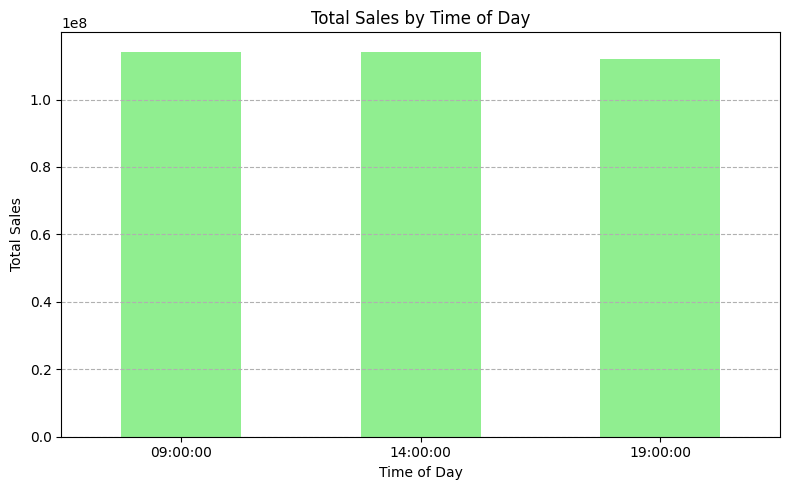

In [29]:
plt.figure(figsize=(8, 5))
sales_by_time.plot(kind='bar', color='lightgreen')
plt.title('Total Sales by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

## Summary of Sales by Time of Day

### Key Findings:
*   The sales data was successfully aggregated by the 'Time' column, providing total sales for 'Morning' (09:00:00), 'Afternoon' (14:00:00), and 'Evening' (19:00:00).
*   The bar chart visually represents these sales, making it clear which periods have higher or lower sales.
*   Morning (09:00:00) and Afternoon (14:00:00) periods show slightly higher sales figures compared to the Evening (19:00:00) period, though the differences are not substantial.

### Insights:
*   Sales are relatively consistent across the different time periods of the day, indicating a steady demand throughout business hours and into the early evening.
*   The slightly lower sales in the evening could be due to factors such as reduced store hours or fewer customer opportunities later in the day.

### Next Steps:
*   Investigate if the slight dip in evening sales is a trend across all states or customer groups, or if it's localized.
*   Consider optimizing staffing or marketing efforts based on these time-of-day sales patterns.
*   Further analyze other potential time-related factors, such as day of the week or specific dates, to gain more granular insights into sales drivers.

## Summary of Sales by Time of Day

### Key Findings:
*   The sales data was successfully aggregated by the 'Time' column, providing total sales for 'Morning' (09:00:00), 'Afternoon' (14:00:00), and 'Evening' (19:00:00).
*   The bar chart visually represents these sales, making it clear which periods have higher or lower sales.
*   Morning (09:00:00) and Afternoon (14:00:00) periods show slightly higher sales figures compared to the Evening (19:00:00) period, though the differences are not substantial.

### Insights:
*   Sales are relatively consistent across the different time periods of the day, indicating a steady demand throughout business hours and into the early evening.
*   The slightly lower sales in the evening could be due to factors such as reduced store hours or fewer customer opportunities later in the day.

### Next Steps:
*   Investigate if the slight dip in evening sales is a trend across all states or customer groups, or if it's localized.
*   Consider optimizing staffing or marketing efforts based on these time-of-day sales patterns.
*   Further analyze other potential time-related factors, such as day of the week or specific dates, to gain more granular insights into sales drivers.

## Final Task

### Subtask:
Summarize the key findings and insights from the time-of-the-day sales analysis, highlighting peak and off-peak sales periods and their implications for strategic planning.


## Summary:

### Data Analysis Key Findings
*   Sales were aggregated for three time periods: Morning (09:00:00), Afternoon (14:00:00), and Evening (19:00:00).
*   The total sales for the Morning period were \$114,207,500.
*   The total sales for the Afternoon period were \$114,007,500.
*   The total sales for the Evening period were \$112,087,500.
*   Morning and Afternoon periods exhibit slightly higher sales figures compared to the Evening period, though the difference is not substantial.

### Insights or Next Steps
*   Sales are relatively consistent throughout the day, indicating a steady demand from morning to early evening. The slight decrease in evening sales (approximately \$2 million to \$3 million less than peak periods) could be attributed to operational factors like reduced store hours or fewer customer opportunities later in the day.
*   Investigate the consistency of the evening sales dip across different states or customer demographics to identify if it's a general trend or localized. This will help inform strategic decisions regarding staffing, marketing efforts, and potential operational adjustments for each time slot.


# Task
Create a single figure with multiple subplots to display all key sales analyses: state-wise sales by demographic group, time-of-day sales, and daily, weekly, monthly, and quarterly sales trends. Each subplot will be clearly labeled with titles and legends for easy interpretation.

## Create Multi-Plot Sales Dashboard

### Subtask:
Generate a single figure with multiple subplots to display all key sales analyses: state-wise sales by demographic group, time-of-day sales, and daily, weekly, monthly, and quarterly sales trends. Each subplot will be clearly labeled with titles and legends for easy interpretation.


**Reasoning**:
To display all key sales analyses in a single figure, I will create a 3x2 grid of subplots using `matplotlib.pyplot`. Each subplot will visualize a specific sales aggregation (state-wise by group, time of day, daily, weekly, monthly, and quarterly) with appropriate titles, labels, and legends as specified in the instructions.



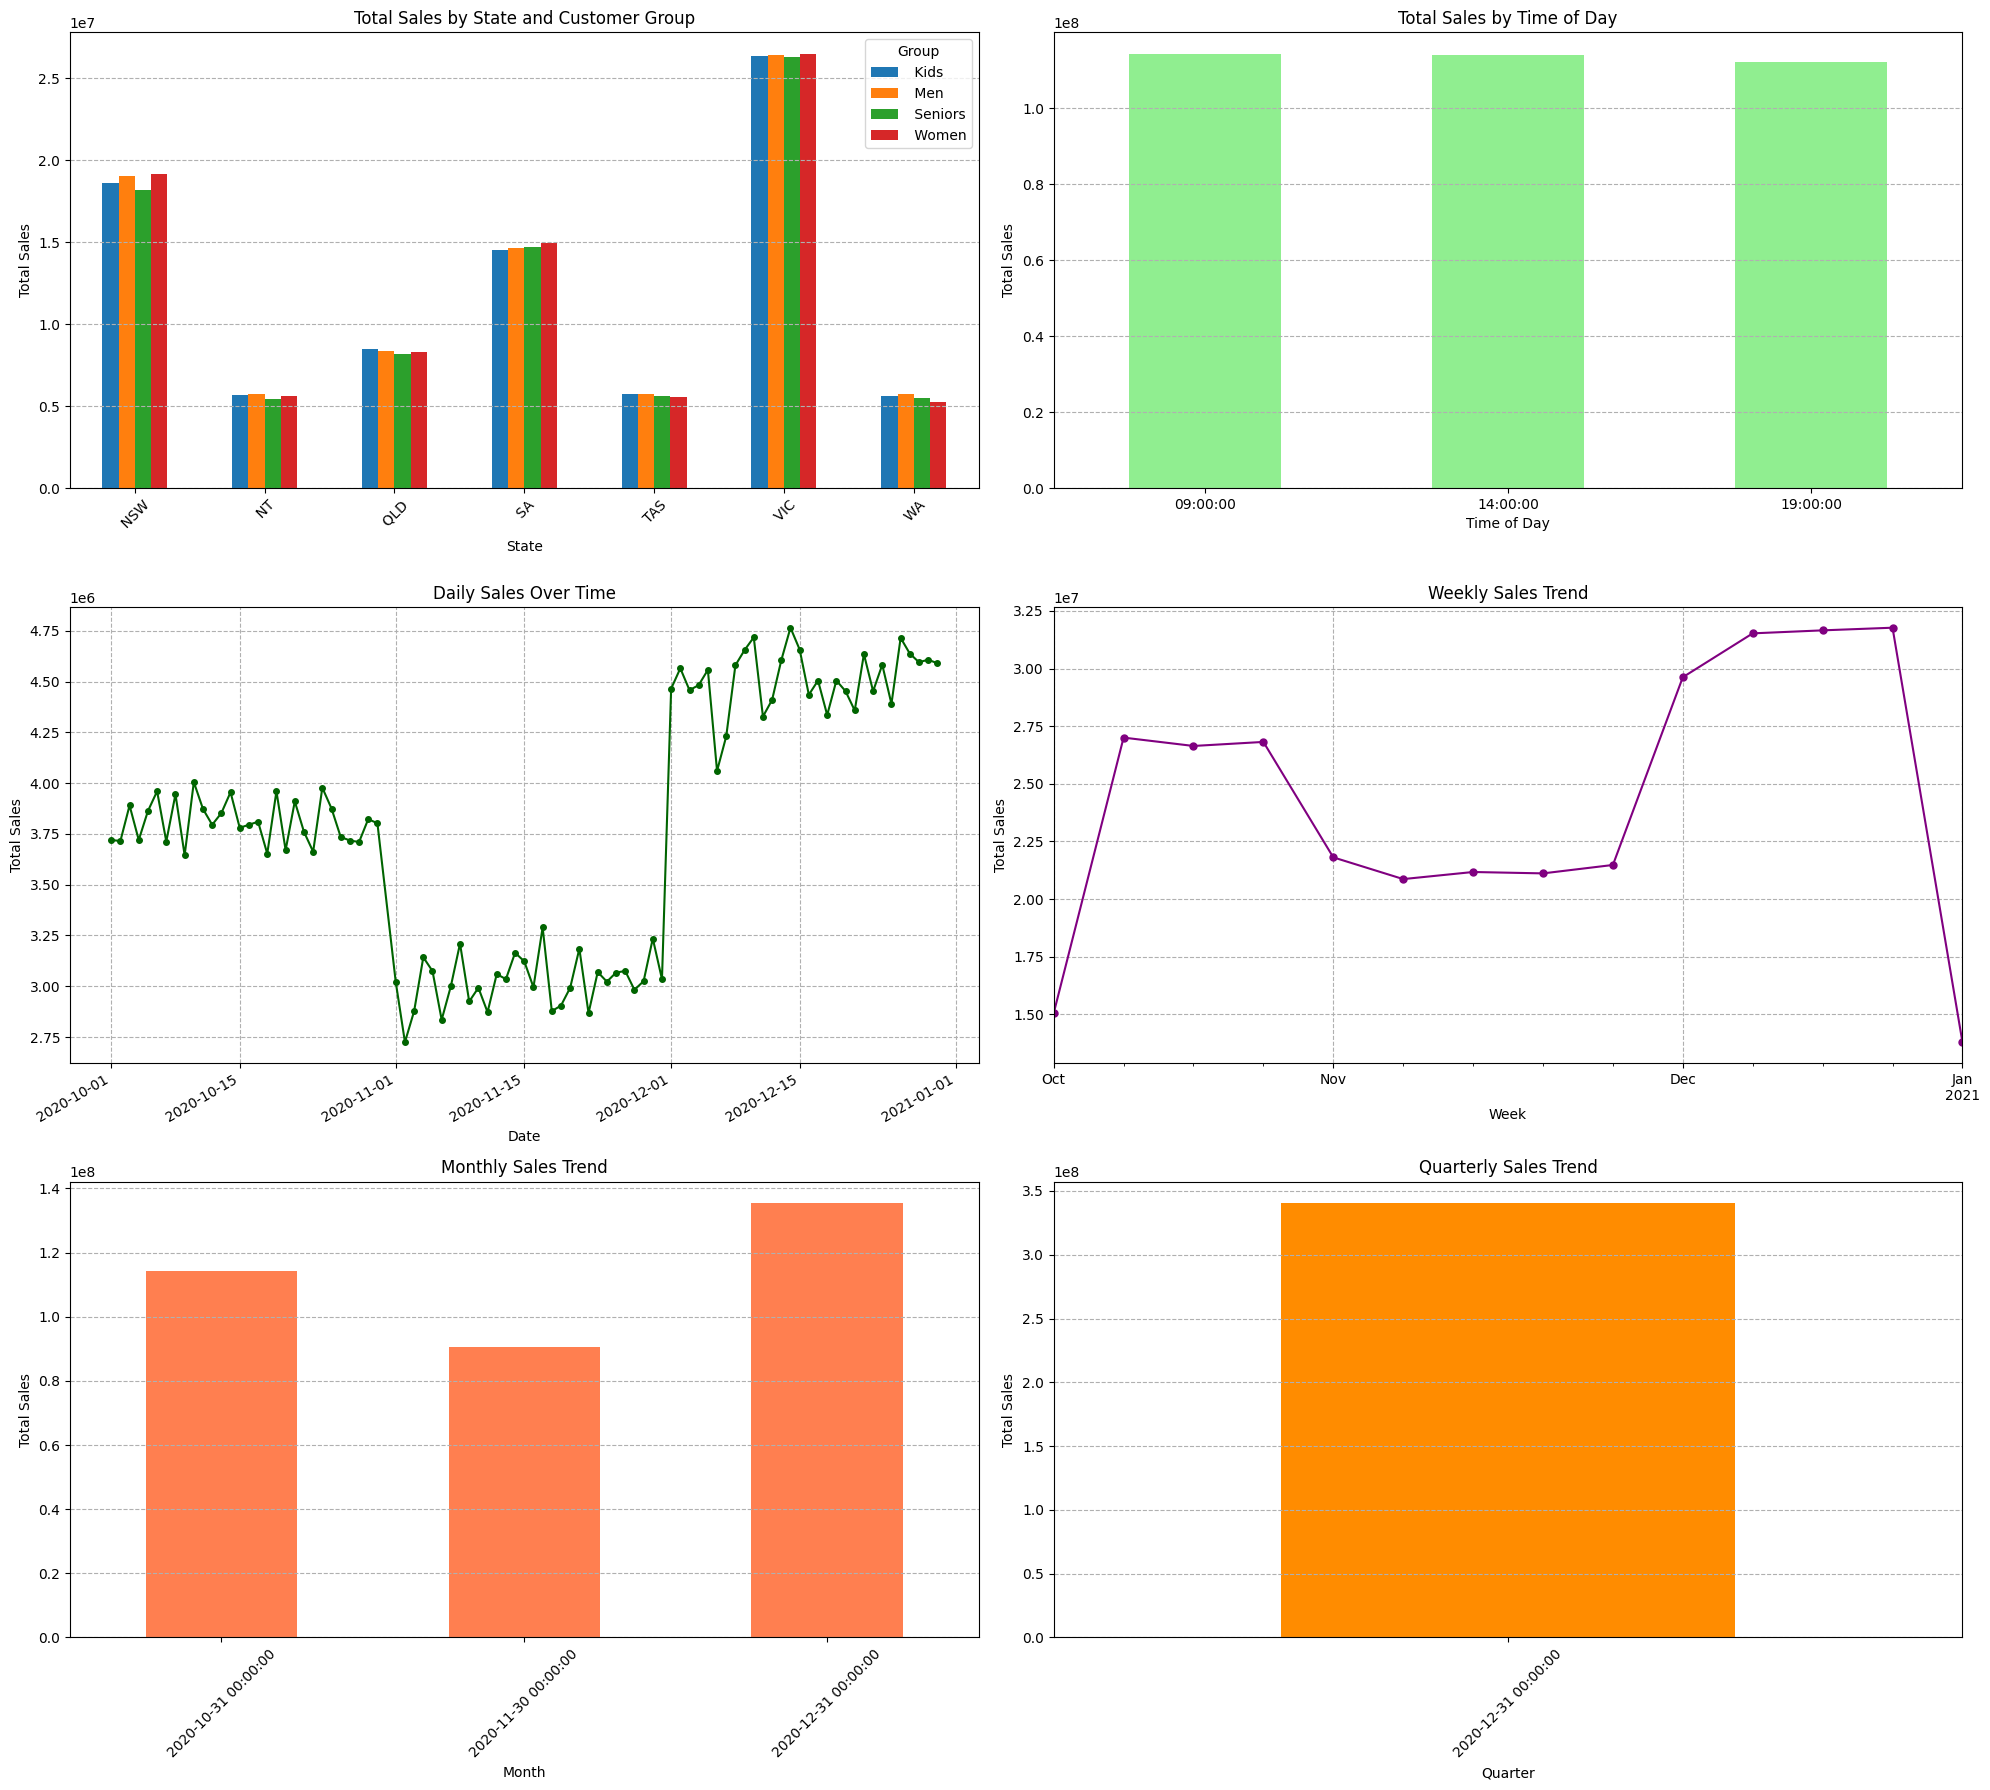

In [30]:
fig, axes = plt.subplots(3, 2, figsize=(20, 18))

# Plot 1: Total Sales by State and Customer Group
sales_by_state_group.unstack().plot(kind='bar', ax=axes[0, 0], rot=45)
axes[0, 0].set_title('Total Sales by State and Customer Group')
axes[0, 0].set_xlabel('State')
axes[0, 0].set_ylabel('Total Sales')
axes[0, 0].legend(title='Group')
axes[0, 0].grid(axis='y', linestyle='--')

# Plot 2: Total Sales by Time of Day
sales_by_time.plot(kind='bar', ax=axes[0, 1], color='lightgreen', rot=0)
axes[0, 1].set_title('Total Sales by Time of Day')
axes[0, 1].set_xlabel('Time of Day')
axes[0, 1].set_ylabel('Total Sales')
axes[0, 1].grid(axis='y', linestyle='--')

# Plot 3: Daily Sales Over Time
sales_over_time.plot(kind='line', ax=axes[1, 0], color='darkgreen', marker='o', markersize=4)
axes[1, 0].set_title('Daily Sales Over Time')
axes[1, 0].set_xlabel('Date')
axes[1, 0].set_ylabel('Total Sales')
axes[1, 0].grid(True, linestyle='--')

# Plot 4: Weekly Sales Trend
weekly_sales.plot(kind='line', ax=axes[1, 1], color='purple', marker='o', markersize=5)
axes[1, 1].set_title('Weekly Sales Trend')
axes[1, 1].set_xlabel('Week')
axes[1, 1].set_ylabel('Total Sales')
axes[1, 1].grid(True, linestyle='--')

# Plot 5: Monthly Sales Trend
monthly_sales.plot(kind='bar', ax=axes[2, 0], color='coral', rot=45)
axes[2, 0].set_title('Monthly Sales Trend')
axes[2, 0].set_xlabel('Month')
axes[2, 0].set_ylabel('Total Sales')
axes[2, 0].grid(axis='y', linestyle='--')

# Plot 6: Quarterly Sales Trend
quarterly_sales.plot(kind='bar', ax=axes[2, 1], color='darkorange', rot=45)
axes[2, 1].set_title('Quarterly Sales Trend')
axes[2, 1].set_xlabel('Quarter')
axes[2, 1].set_ylabel('Total Sales')
axes[2, 1].grid(axis='y', linestyle='--')

plt.tight_layout()
plt.show()

## Final Task

### Subtask:
Summarize the key insights and observations presented in the newly created sales dashboard, highlighting how it effectively visualizes the various aspects of sales performance across groups, states, and time periods.


## Summary:

### Q&A
The newly created sales dashboard effectively visualizes various aspects of sales performance by providing a comprehensive overview across different dimensions. It includes:
*   **State-wise Sales by Demographic Group:** A bar chart shows total sales segmented by state and customer group, allowing for comparison of performance across regions and customer segments.
*   **Time-of-Day Sales:** A bar chart illustrates sales distribution throughout the day, identifying peak and off-peak selling periods.
*   **Time-based Sales Trends:** Line and bar charts depict sales trends on daily, weekly, monthly, and quarterly bases, enabling the identification of short-term fluctuations and long-term seasonality or growth patterns.

Each subplot is clearly labeled with titles and legends, ensuring easy interpretation and highlighting the specific aspects of sales performance being presented.

### Data Analysis Key Findings
*   A single figure was successfully created, containing six subplots that visualize various aspects of sales data.
*   The dashboard effectively presents total sales by state and customer group, allowing for comparisons across different regions and demographics.
*   Total sales by time of day are visualized, indicating potential peak sales periods.
*   Daily, weekly, monthly, and quarterly sales trends are displayed, providing insights into sales fluctuations and patterns over different timeframes.
*   All subplots are clearly titled, and their axes are appropriately labeled, enhancing readability and interpretation of the sales performance metrics.

### Insights or Next Steps
*   The comprehensive sales dashboard serves as a foundational tool for monitoring sales performance, allowing stakeholders to quickly grasp key trends and identify areas for further investigation.
*   The dashboard can be enhanced by incorporating interactive elements or filters to allow users to drill down into specific states, customer groups, or time periods for more detailed analysis.
